<a href="https://colab.research.google.com/github/LuisMirandaMallqui/Inteligencia_Artificial_TareaAcademica_Grupo8_H783/blob/main/Trabajo_Grupo8_IA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [22]:
#Bibliotecas y librerias a usar
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

In [31]:
#Carga de datos
df = pd.read_csv('CNV_MINSA_4782338_CORTE_310825.csv',delimiter=';',on_bad_lines='skip', dtype={'Num_embar_madre': str})
#La carga de datos la dejo en una celda aislada pues el archivo es muy pesado
# Diccionario de renombrado de columnas
df.rename(columns={
    'FecNac_Año': 'Año_Nacimiento',
    'FecNac_Mes': 'Mes_Nacimiento',
    'PESO_NACIDO': 'Peso_Nacido',
    'TALLA_NACIDO': 'Talla_Nacido',
    'DUR_EMB_PARTO': 'Duracion_Embarazo',
    'Condicion_Parto': 'Condicion_Parto',
    'sexo_nacido': 'Sexo_Nacido',
    'Tipo_Parto': 'Tipo_Parto',
    'Edad_Madre': 'Edad_Madre',
    'Estado_Civil': 'Estado_Civil_Madre',
    'Nivel_Intrucción_Madre': 'Nivel_Instruccion_Madre',
    'DESC_OCUPACION': 'Ocupacion_Madre',
    'Num_embar_madre': 'Numero_Embarazos_Madre',
    'Hijos_vivo_madre': 'Hijos_Vivos_Madre',
    'Hijos_fallec_madre': 'Hijos_Fallecidos_Madre',
    'nacmuer_abort_madre': 'Abortos_Madre',
    'Pais_Madre': 'Pais_Madre',
    'IdUbigeoInei': 'Codigo_Ubigeo',
    'Ipress': 'Ipress_Hospital',
    'Lugar_Nacido': 'Lugar_Nacimiento',
    'Atiende_Parto': 'Atiende_Parto',
    'Financiador_Parto': 'Financiador_Parto'
}, inplace=True)

# Verifica los nuevos nombres
df.columns



Index(['Año_Nacimiento', 'Mes_Nacimiento', 'Peso_Nacido', 'Talla_Nacido',
       'Duracion_Embarazo', 'Condicion_Parto', 'Sexo_Nacido', 'Tipo_Parto',
       'Edad_Madre', 'Estado_Civil_Madre', 'Nivel_Instruccion_Madre',
       'Ocupacion_Madre', 'Numero_Embarazos_Madre', 'Hijos_Vivos_Madre',
       'Hijos_Fallecidos_Madre', 'Abortos_Madre', 'Pais_Madre',
       'Codigo_Ubigeo', 'Ipress_Hospital', 'Lugar_Nacimiento', 'Atiende_Parto',
       'Financiador_Parto'],
      dtype='object')

# **ANALISIS DE DATOS**

In [32]:
#Analizar filas dañadas
df = pd.read_csv('CNV_MINSA_4782338_CORTE_310825.csv', delimiter=';', on_bad_lines='warn')
# Diccionario de renombrado de columnas
df.rename(columns={
    'FecNac_Año': 'Año_Nacimiento',
    'FecNac_Mes': 'Mes_Nacimiento',
    'PESO_NACIDO': 'Peso_Nacido',
    'TALLA_NACIDO': 'Talla_Nacido',
    'DUR_EMB_PARTO': 'Duracion_Embarazo',
    'Condicion_Parto': 'Condicion_Parto',
    'sexo_nacido': 'Sexo_Nacido',
    'Tipo_Parto': 'Tipo_Parto',
    'Edad_Madre': 'Edad_Madre',
    'Estado_Civil': 'Estado_Civil_Madre',
    'Nivel_Intrucción_Madre': 'Nivel_Instruccion_Madre',
    'DESC_OCUPACION': 'Ocupacion_Madre',
    'Num_embar_madre': 'Numero_Embarazos_Madre',
    'Hijos_vivo_madre': 'Hijos_Vivos_Madre',
    'Hijos_fallec_madre': 'Hijos_Fallecidos_Madre',
    'nacmuer_abort_madre': 'Abortos_Madre',
    'Pais_Madre': 'Pais_Madre',
    'IdUbigeoInei': 'Codigo_Ubigeo',
    'Ipress': 'Ipress_Hospital',
    'Lugar_Nacido': 'Lugar_Nacimiento',
    'Atiende_Parto': 'Atiende_Parto',
    'Financiador_Parto': 'Financiador_Parto'
}, inplace=True)

/tmp/ipython-input-692177020.py:2: ParserWarning: Skipping line 4410: expected 22 fields, saw 23
Skipping line 24028: expected 22 fields, saw 23
Skipping line 30508: expected 22 fields, saw 23

  df = pd.read_csv('CNV_MINSA_4782338_CORTE_310825.csv', delimiter=';', on_bad_lines='warn')
/tmp/ipython-input-692177020.py:2: ParserWarning: Skipping line 59866: expected 22 fields, saw 23
Skipping line 61121: expected 22 fields, saw 23

  df = pd.read_csv('CNV_MINSA_4782338_CORTE_310825.csv', delimiter=';', on_bad_lines='warn')
/tmp/ipython-input-692177020.py:2: ParserWarning: Skipping line 71027: expected 22 fields, saw 23
Skipping line 77936: expected 22 fields, saw 23
Skipping line 83729: expected 22 fields, saw 23
Skipping line 85126: expected 22 fields, saw 23

  df = pd.read_csv('CNV_MINSA_4782338_CORTE_310825.csv', delimiter=';', on_bad_lines='warn')
/tmp/ipython-input-692177020.py:2: ParserWarning: Skipping line 107576: expected 22 fields, saw 23
Skipping line 130710: expected 22 fiel

In [33]:
# En total tenemos 134 filas dañadas
# DtypeWarning sugiere que la columna 14 tiene tipos de datos mixtos (por ejemplo, números y texto en la misma columna), esto puede ocasionar problemas al analizar los datos.
# La solución es especificar un tipo de dato para al cargar el archivo, en este caso tome string porque el valor raro es >=5 .

In [34]:
# Información del data frame
df.head()
df.dtypes

,0
Año_Nacimiento,int64
Mes_Nacimiento,int64
Peso_Nacido,int64
Talla_Nacido,float64
Duracion_Embarazo,int64
Condicion_Parto,object
Sexo_Nacido,object
Tipo_Parto,object
Edad_Madre,int64
Estado_Civil_Madre,object


\nPorcentaje de nulos por columna (%):
Año_Nacimiento             0.0
Mes_Nacimiento             0.0
Peso_Nacido                0.0
Talla_Nacido               0.0
Duracion_Embarazo          0.0
Condicion_Parto            0.0
Sexo_Nacido                0.0
Tipo_Parto                 0.0
Edad_Madre                 0.0
Estado_Civil_Madre         0.0
Nivel_Instruccion_Madre    0.0
Ocupacion_Madre            0.0
Numero_Embarazos_Madre     0.0
Hijos_Vivos_Madre          0.0
Hijos_Fallecidos_Madre     0.0
Abortos_Madre              0.0
Pais_Madre                 0.0
Codigo_Ubigeo              0.0
Ipress_Hospital            0.0
Lugar_Nacimiento           0.0
Atiende_Parto              0.0
Financiador_Parto          0.0
dtype: float64


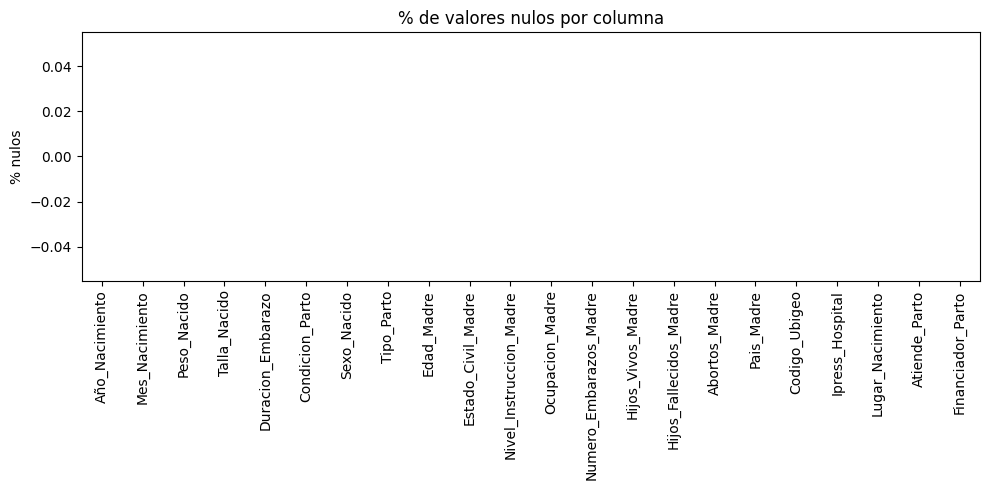

In [35]:
#Revisión de los datos:
# Verificar valores nulos
# Porcentaje de nulos
null_pct = (df.isna().sum() / len(df)).sort_values(ascending=False) * 100
print("\\nPorcentaje de nulos por columna (%):")
print(null_pct)
#No se presentan valores nulos, lo ejecute por separado y todos salian 0 en la tabla, pero al ejecutar estos comandos en secuencia solo aparece el resultado del último por alguna razón
# --- Gráfico 1: barras de % de nulos ---
plt.figure(figsize=(10, 5))
null_pct.plot(kind='bar')
plt.title('% de valores nulos por columna')
plt.ylabel('% nulos')
plt.tight_layout()
plt.show()

# Verificar duplicados
#df.duplicated().sum()
#Presenta 953 datos

# **LIMPIEZA DE DATOS**

In [36]:
#Limpieza de datos:
#Primero: eliminar duplicados para evitar que el modelo se entrene con datos redundantes.
#df.drop_duplicates(inplace=True)
#df.duplicated().sum()
#Analizando las columnas me parece que no hay problema con los repetidos, es normal pues no tratamos con datos especificos de las personas




# **TRASNFORMACIÓN DE VARIABLES (preprocesamiento)**


### **Transformación de variables (preprocesamiento)**

Asegurar que los datos estén en el formato correcto para el análisis y que no haya inconsistencias. Se realizan las modificaciones necesarias para que las columnas sean coherentes con el análisis.

#### **Pasos**:

1. **Convertir variables categóricas en numéricas** (si es necesario):

2. **Convertir columnas de fecha a tipo `datetime`**:

3. **Normalizar o estandarizar columnas numéricas**:
   Si tus columnas numéricas tienen diferentes escalas (por ejemplo, edad de la madre y peso del bebé), es útil **normalizarlas o estandarizarlas** para que estén en la misma escala y el modelo no se vea influenciado por la magnitud de los valores.

   Ejemplo de **Estandarización**:

   ```python
   from sklearn.preprocessing import StandardScaler

   # Normalizar la columna Edad_Madre
   scaler = StandardScaler()
   df[['Edad_Madre']] = scaler.fit_transform(df[['Edad_Madre']])
   ```

4. **Lidiar con valores nulos**

### **¿Por qué es importante esto?**

* **Transformación de variables**: Necesitas asegurarte de que las variables estén en un formato adecuado para el análisis.
* **Escalado y normalización**: Algunos modelos (como KNN o redes neuronales) son sensibles a la escala de los datos, por lo que es necesario normalizar o estandarizar las columnas numéricas.
* **Limpieza de valores nulos**: Los valores faltantes pueden sesgar los resultados si no se manejan correctamente. Es importante decidir si eliminar esos registros o rellenarlos de manera adecuada.

---

### **Resumen**:

En el **punto 4**, te enfocas en **preparar los datos** para que sean compatibles con los modelos que utilizarás. Esto incluye la **transformación de columnas**, la **normalización de datos**, y el manejo de **valores nulos o erróneos**.

Si necesitas ayuda implementando alguna de estas transformaciones o con el código en **Google Colab**, ¡avísame y con gusto te asisto!


# Columnas 1 y 2:  Año_Nacimiento y Mes_Nacimiento

In [37]:
# 1. Crea un diccionario mapeando los nombres de tus columnas a los nombres que pd.to_datetime espera ('year', 'month', 'day').
date_components = {
    'year': df['Año_Nacimiento'],
    'month': df['Mes_Nacimiento'],
    'day': 1  # Asignamos el día 1 a todos, es por cuestión de que la función lo requiere. Se permite esto pues no afecta al analisis
}

# 2. Pasa este diccionario a pd.to_datetime
df['Fecha_Nacimiento'] = pd.to_datetime(date_components)

# 3. Ahora puedes eliminar las columnas originales
df.drop(columns=['Año_Nacimiento', 'Mes_Nacimiento'], inplace=True)

# 4. Verificar las primeras filas y el tipo de dato
print(df.head())
print(f"Tipo de dato de la nueva columna: {df['Fecha_Nacimiento'].dtype}")

   Peso_Nacido  Talla_Nacido  Duracion_Embarazo Condicion_Parto Sexo_Nacido  \
0         3425          51.4                 41         CESAREA    FEMENINO   
1         3320          48.0                 40        EUTOCICO    FEMENINO   
2         3200          50.0                 39         CESAREA   MASCULINO   
3         3850          51.0                 39        EUTOCICO   MASCULINO   
4         3990          51.0                 38         CESAREA   MASCULINO   

  Tipo_Parto  Edad_Madre Estado_Civil_Madre     Nivel_Instruccion_Madre  \
0      UNICO          36            SOLTERO         PRIMARIA INCOMPLETA   
1      UNICO          35            SOLTERO           PRIMARIA COMPLETA   
2      UNICO          32            SOLTERO         PRIMARIA INCOMPLETA   
3      UNICO          34            SOLTERO       SECUNDARIA INCOMPLETA   
4      UNICO          33         DIVORCIADO  SUPERIOR NO UNIV. COMPLETA   

  Ocupacion_Madre  ... Hijos_Vivos_Madre Hijos_Fallecidos_Madre Abortos_Ma

# Columna 14: Abortos_Madre

In [ ]:
#Contiene valores mixtos, como números (2, 1), la cadena "NINGUNO", y "11 a más". Este tipo de datos puede generar problemas al momento de hacer análisis numéricos o de clasificación.
#Ajustes realizados:
# Reemplazar valores "NINGUNO" por 0
df['Abortos_Madre'] = df['Abortos_Madre'].replace('NINGUNO', 0)
# Reemplazar valores "11 a más" por 11
df['Abortos_Madre'] = df['Abortos_Madre'].replace('11 a más', 11)
# Asegurarse de que todos los valores sean numéricos (puedes convertirlos a enteros o flotantes)
df['Abortos_Madre'] = pd.to_numeric(df['Abortos_Madre'], errors='coerce')
# Verifica la corrección
df['Abortos_Madre'].head()

Columnas para descartar:

Estado_Civil (Estado_Civil):
No es tan relevante para predecir la tasa de natalidad directamente.

Nivel_Instruccion_Madre (Nivel_Intrucción_Madre):
Si no estás considerando la educación de las madres como factor en tu modelo de natalidad, esta columna podría no ser necesaria.

Ocupacion_Madre (Ocupacion_Madre  ):
A menos que quieras explorar cómo el empleo de la madre afecta la natalidad, puedes prescindir de esta columna.

# Manejo de valores atípicos (outliers)

## **Consultas Iteligencia generativa**

Prompt 1:
mi profesor nos dio este documento tambien, hizo enfasis en 1.13. Selección de características — documentación de scikit-learn 1.7.2

El **documento sobre la selección de características de scikit-learn** que te proporcionó tu profesor se enfoca en un aspecto crucial para mejorar la **precisión y eficiencia de los modelos predictivos**. La selección de características (feature selection) es un proceso importante cuando tienes muchas variables y deseas reducir la **dimensionalidad** del problema, eliminando aquellas que son irrelevantes o redundantes.

### **¿Qué es la Selección de Características?**

La **selección de características** es el proceso de identificar y seleccionar un subconjunto de características más relevantes de un conjunto de datos, lo cual ayuda a:

* Mejorar el rendimiento del modelo.
* Reducir el sobreajuste (overfitting).
* Reducir el tiempo de entrenamiento y de predicción.

### **Enfoques principales para la Selección de Características**:

1. **Métodos de Filtro (Filter Methods)**:

   * Evalúan las características de forma independiente usando estadísticas o métricas, sin considerar el modelo que se va a usar.
   * Ejemplos:

     * **Chi-cuadrado** (`chi2`)
     * **ANOVA F-value** (`f_classif`)
     * **Correlación** (entre características y la variable objetivo).

2. **Métodos de Envolvimiento (Wrapper Methods)**:

   * Utilizan un modelo predictivo para evaluar el desempeño de las características seleccionadas.
   * Ejemplo: **Selección recursiva de características (RFE)**, que entrena el modelo y elimina las características menos importantes de forma recursiva.

3. **Métodos Basados en la Importancia de los Modelos (Embedded Methods)**:

   * Se realizan durante el entrenamiento del modelo, ya que algunos modelos calculan la **importancia de las características**.
   * Ejemplo: **Árboles de decisión** (Decision Trees) o **Random Forests**.

---

### **Implementación de Selección de Características en scikit-learn**:

Si quieres usar la selección de características en **scikit-learn** para tu proyecto, puedes utilizar algunas de las herramientas que la documentación proporciona. A continuación te doy un ejemplo básico de cómo usar **`SelectKBest`**, que es un método de filtro para seleccionar las mejores características según una estadística.

### **Ejemplo básico con `SelectKBest`**:

```python
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_iris
from sklearn.ensemble import RandomForestClassifier

# Cargar un dataset de ejemplo (Iris)
data = load_iris()
X = data.data  # Características
y = data.target  # Objetivo

# Dividir el dataset en conjunto de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Seleccionar las 2 mejores características usando ANOVA F-value
selector = SelectKBest(f_classif, k=2)
X_new = selector.fit_transform(X_train, y_train)

# Ver las características seleccionadas
print("Características seleccionadas:", selector.get_support())
print("Mejores características:", X_new[:5])

# Entrenar un modelo con las características seleccionadas
model = RandomForestClassifier()
model.fit(X_new, y_train)

# Evaluar en el conjunto de prueba
X_test_selected = selector.transform(X_test)
score = model.score(X_test_selected, y_test)
print("Precisión en el conjunto de prueba:", score)
```

### **Explicación**:

1. **`SelectKBest`**: Selecciona las **`k`** mejores características según el criterio que se elija. En este caso, se usa **ANOVA F-value** (`f_classif`), que es común para **clasificación**.
2. **`fit_transform`**: Ajusta el selector a los datos y selecciona las mejores características del conjunto de entrenamiento.
3. **Modelo**: Se entrena un **RandomForestClassifier** utilizando solo las características seleccionadas.

### **Otros métodos de selección en scikit-learn**:

* **`RFE` (Recursive Feature Elimination)**: Elimina recursivamente las características menos importantes.
* **`RFECV`**: Utiliza la validación cruzada para encontrar el número óptimo de características.

---

### **Próximos pasos para aplicar esto en tu trabajo**:

1. **Cargar y preparar tus datos**: Asegúrate de que las columnas estén en el formato correcto y de que hayas realizado un buen preprocesamiento.
2. **Seleccionar las mejores características**: Usa `SelectKBest` o `RFE` para identificar las características más relevantes para la predicción de la **tasa de natalidad**.
3. **Entrenar y evaluar tu modelo**: Con las características seleccionadas, entrena tu modelo y evalúa su desempeño.

---

Si necesitas más detalles sobre algún método de selección de características o ejemplos más específicos de cómo integrarlo en tu proyecto, ¡avísame y te ayudo!
